### Objetivo: 

Analizar los datos integrados (clientes, Yelp) para identificar patrones relevantes que puedan guiar decisiones de marketing. Formular preguntas clave del negocio y responderlas con visualizaciones y análisis descriptivo. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('base_usuarios_limpia.csv')

In [ ]:
df_res = pd.read_csv('yelp_restaurantes_miami_limpia.csv')

### Análisis descriptivo

En el avance 1 realizamos gráficos univariados.  Los replicamos: 

In [ ]:
# Función para graficar variables numéricas por categoricas:
# clasifico las variables para un análisis diferencial  e incluyo solo las que no entrarán en el análisis descriptivo inical:

variables_categoricas = [col for col in df.select_dtypes(exclude='number').columns
                       if col not in ['ciudad_residencia','nombre','apellido','correo_electronico','telefono_contacto', 'recomendaciones']]
                                      
variables_numericas = [col for col in df.select_dtypes(include='number').columns
                       if col not in 'id_persona']

print ('Variables categóricas: ', variables_categoricas)
print('Variables numéricas: ', variables_numericas)

#Estrato a categórica ordinal

#ordenamos categoría de variable ordinal: 
orden = ['Bajo', 'Medio', 'Alto', 'Muy Alto' ]
df['estrato_socioeconomico'] = pd.Categorical(
    df['estrato_socioeconomico'],
    categories=orden,
    ordered=True
)

df.info()

In [ ]:
# Gráficos univariados de variables categoricas

for col in variables_categoricas:
    etiqueta = col.replace('_', ' ').title()  # Saco _ y formato titulo
    data = df[col].value_counts(normalize=True) * 100
    ax = data.plot(kind='bar', color='skyblue')
    plt.title(f'Distribución relativa de {etiqueta}')
    plt.xlabel(etiqueta)
    plt.ylabel('%')
    plt.xticks(rotation=45)
    
    # Agregar etiquetas arriba de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.show()

In [ ]:
for col in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    etiqueta = col.replace('_', ' ').title()  # Saco _ y formato titulo
    plt.xlabel(etiqueta)
    plt.title(f'Distribución de {etiqueta}')
    plt.xlabel(etiqueta)
    plt.ylabel('Frecuencia')
    plt.show()

### Análisis bivariado:

In [ ]:
#Función para graficar variable numerica por categorica: 
%matplotlib inline 
def graficar_bivariados(df, variables_numericas, variables_categoricas, tipo='box'):
    '''
    Genera gráficos bivariados entre variables numéricas y categóricas.
    
    Parámetros:
    - df: DataFrame
    - variables_numericas: lista de columnas numéricas
    - variables_categoricas: lista de columnas categóricas
    - tipo: 'box', 'violin', 'bar' o 'strip'
    '''
    for num_col in variables_numericas:
        for cat_col in variables_categoricas:
            etiqueta_num = num_col.replace('_', ' ').title()
            etiqueta_cat = cat_col.replace('_', ' ').title()

            plt.figure(figsize=(8, 5))

            if tipo == 'box':
                sns.boxplot(
                    data=df, x=cat_col, y=num_col, 
                    hue=cat_col, legend=False, palette='Set2'
                )
            elif tipo == 'violin':
                sns.violinplot(
                    data=df, x=cat_col, y=num_col, 
                    hue=cat_col, legend=False, palette='Set2'
                )
            elif tipo == 'bar':
                sns.barplot(
                    data=df, x=cat_col, y=num_col, 
                    hue=cat_col, legend=False, palette='Set2'
                )
            elif tipo == 'strip':
                sns.stripplot(
                    data=df, x=cat_col, y=num_col, 
                    hue=cat_col, legend=False, palette='Set2',
                    jitter=True, alpha=0.7
                )
            else:
                raise ValueError('El parámetro 'tipo' debe ser 'box', 'violin', 'bar' o 'strip'.')

            plt.title(f'{etiqueta_num} según {etiqueta_cat}')
            plt.xlabel(etiqueta_cat)
            plt.ylabel(etiqueta_num)
            plt.xticks(rotation=30)
            plt.show()


Segmentación por edad: 

In [ ]:
graficar_bivariados(df = df, variables_numericas= ['edad'], variables_categoricas= ['consume_licor'],tipo='bar')
graficar_bivariados(df = df, variables_numericas= ['edad'], variables_categoricas= ['tipo_de_pago_mas_usado'])


In [ ]:
graficar_bivariados(df = df, variables_numericas= ['edad'], variables_categoricas= ['preferencias_alimenticias'])

In [ ]:
# •	Generar un gráfico que muestre la relación entre el consumo de alcohol en los restaurantes y la edad de los clientes.
plt.figure(figsize=(10,6))

consumo_por_edad = df.groupby(['edad', 'consume_licor']).size().reset_index(name='cantidad')

sns.barplot(consumo_por_edad, x='edad', y='cantidad', hue='consume_licor')
plt.xticks(range(0, len(consumo_por_edad['edad'].unique()), 5), 
           consumo_por_edad['edad'].unique()[::5], rotation=45)
plt.title('Consumo de alcohol por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de casos')
plt.legend(title='Consumo Alcohol')
plt.grid(True)
plt.show()

¿Qué características tienen los más jóvenes que visitan restarurantes? 
-	Algo más de incidencia en pagos con criptomoneda
-	Más presencia en preferencias veganas. 
-   Hay una relación entre edad y consumo de alcohol, pero no es lineal (a más edad, menos consumo). Los menores de 30 y el grupo entre 55 y 70 tienen un consumo mayor, en tanto en los mayores de esa edad sucede lo inverso y en el grupo de edades medias(30-54) tienen una proporción similar los que consumen alcohol y los que no. 


# Segmentación según frecuencia de visita

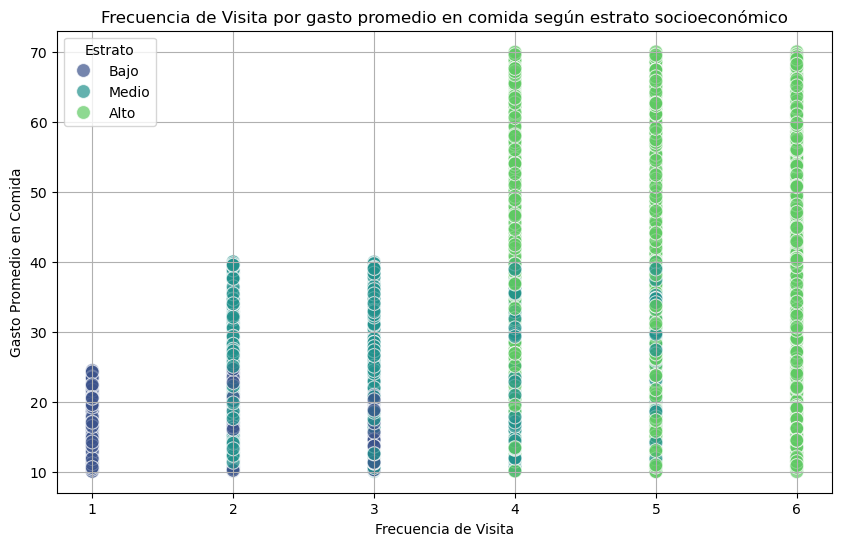

In [101]:
##	Generar un gráfico donde se evidencie cómo es la relación entre la frecuencia de visita a los restaurantes y el gasto promedio por comida según el estrato socioeconómico.

df['estrato_socioeconomico'] = pd.Categorical(df['estrato_socioeconomico'], categories=orden, ordered=True)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='frecuencia_visita',
    y='promedio_gasto_comida',
    hue='estrato_socioeconomico',  
    palette='viridis',
    s=100,                         
    alpha=0.7
)
plt.xlabel('Frecuencia de Visita')
plt.ylabel('Gasto Promedio en Comida')
plt.title('Frecuencia de Visita por gasto promedio en comida según estrato socioeconómico')
plt.legend(title='Estrato')
plt.grid(True)
plt.show()


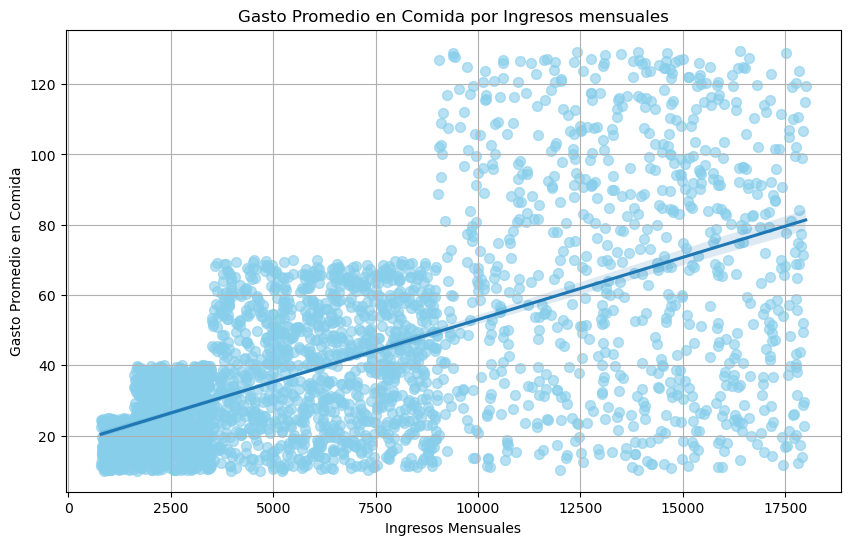

In [102]:
# Crear un gráfico de dispersión que evidencie cómo es la relación entre el gasto promedio mensual de todas las personas y sus ingresos mensuales.
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='ingresos_mensuales',
    y='promedio_gasto_comida',
    scatter_kws={'alpha':0.6, 'color':'skyblue', 's':50}
)
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Gasto Promedio en Comida')
plt.title('Gasto Promedio en Comida por Ingresos mensuales')
plt.grid(True)
plt.show()

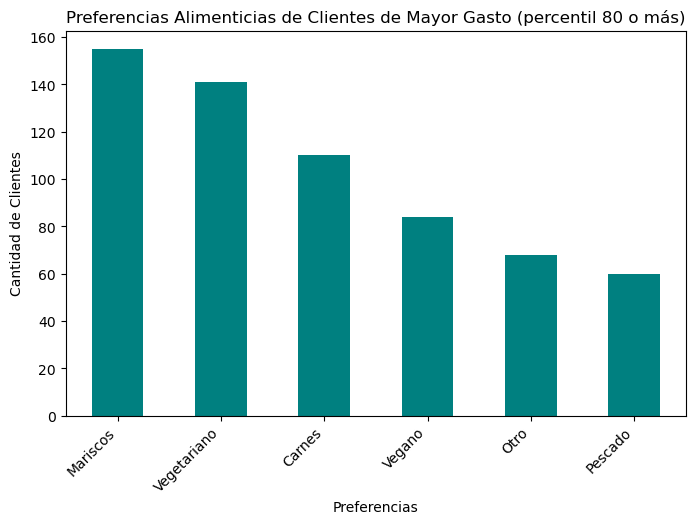

In [103]:
#Perfilar los clientes de mayor gasto: Qué comidas les gustan, cuánto suelen gastar al mes.
P80 = df['promedio_gasto_comida'].quantile(0.8)
clientes_top = df[df['promedio_gasto_comida'] >= P80 ]

preferencias_top = clientes_top['preferencias_alimenticias'].value_counts()

preferencias_top.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Preferencias Alimenticias de Clientes de Mayor Gasto (percentil 80 o más)')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Preferencias')
plt.xticks(rotation=45, ha='right')
plt.show()

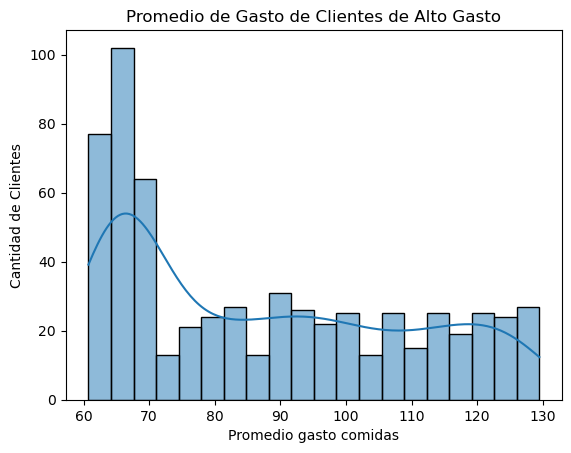

In [104]:
sns.histplot(clientes_top['promedio_gasto_comida'], bins=20, kde=True)
plt.title('Promedio de Gasto de Clientes de Alto Gasto')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Promedio gasto comidas')
plt.show()



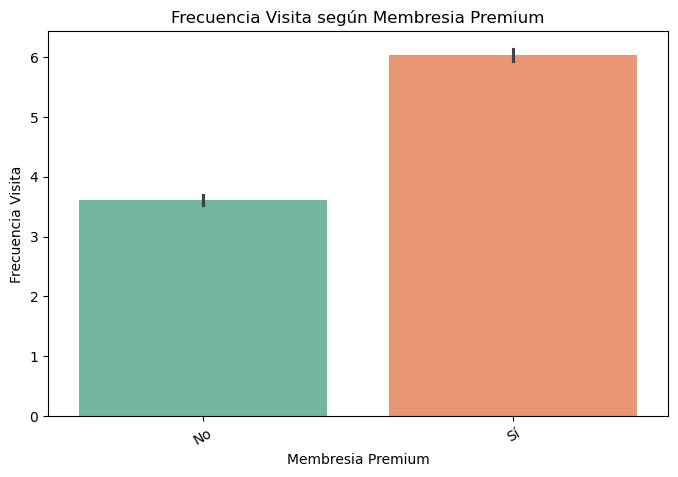

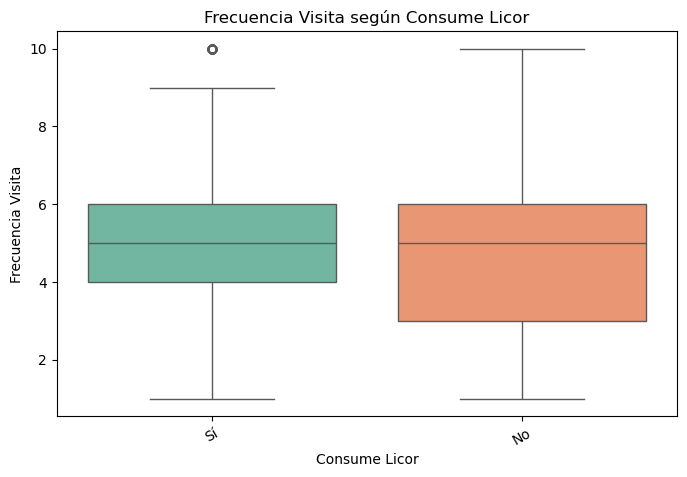

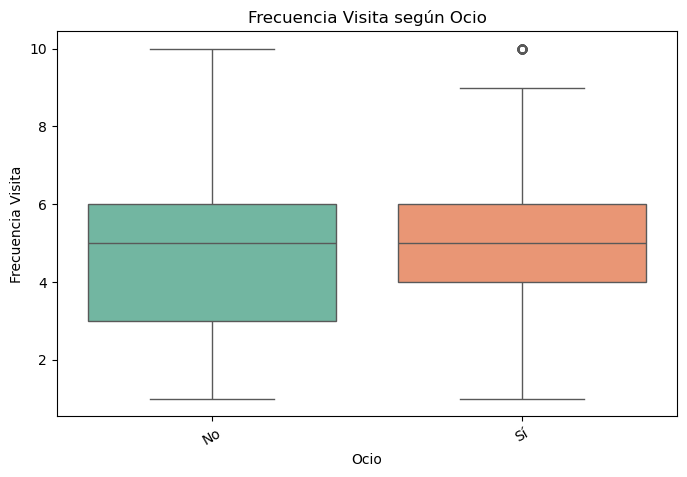

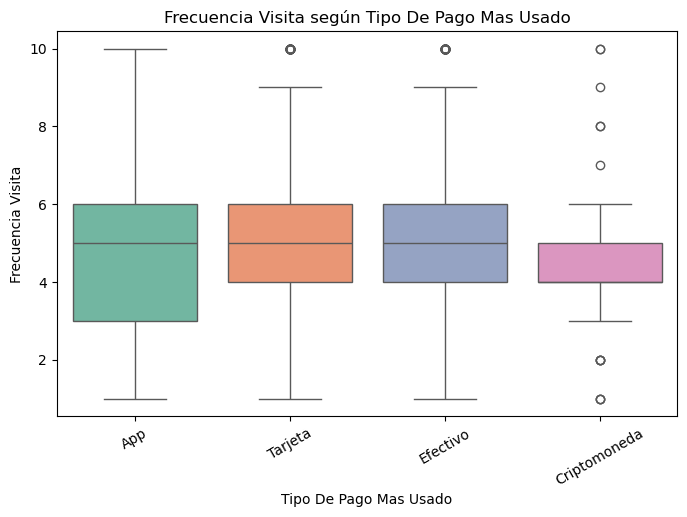

In [105]:
graficar_bivariados(df = df, variables_numericas= ['frecuencia_visita'], variables_categoricas= ['membresia_premium' ],tipo='bar')
graficar_bivariados(df = df, variables_numericas= ['frecuencia_visita'], variables_categoricas= ['consume_licor', 'ocio', 'tipo_de_pago_mas_usado'])

Qué perfil tienen los que tienen más frecuencia de visitas?
-	Fuerte relación positiva directa con el estrato socioeconómico: A mayor estrato, más ingresos, mayor frecuencia y mayor gasto . 
-	Más proporción de membresía premium
-	Van en mayor medida por ocio. 
-	Más consumo de alcohol


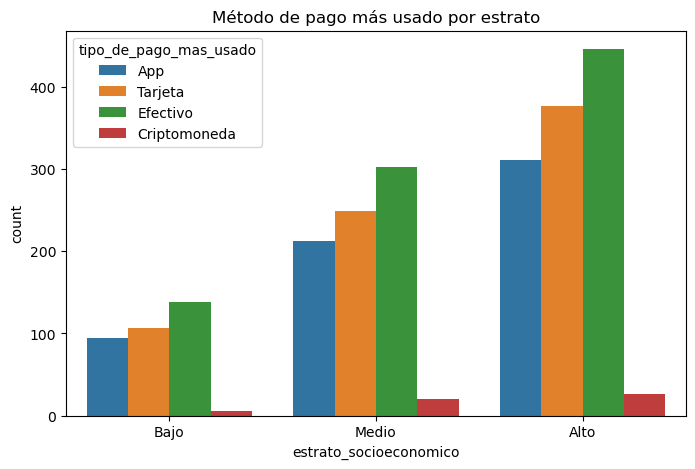

In [106]:
# Metodos de pago: 

plt.figure(figsize=(8,5))
sns.countplot(x='estrato_socioeconomico', hue='tipo_de_pago_mas_usado', data=df, palette='tab10')
plt.title('Método de pago más usado por estrato')
plt.show()



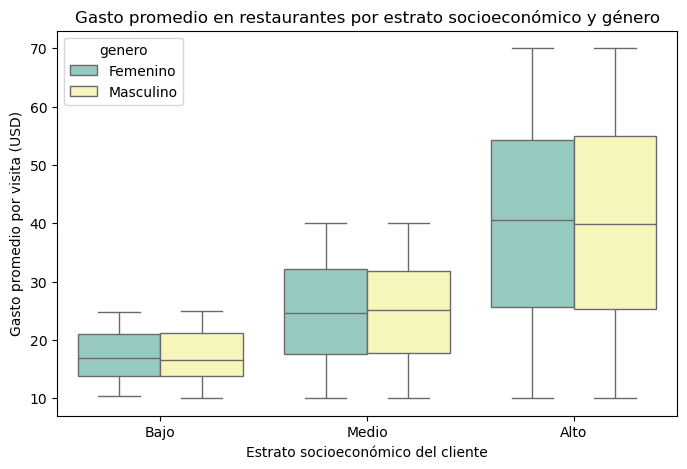

In [107]:
plt.figure(figsize=(8,5))
sns.boxplot(x='estrato_socioeconomico', y='promedio_gasto_comida', hue='genero', data=df, palette='Set3')
plt.title('Gasto promedio en restaurantes por estrato socioeconómico y género')
plt.xlabel('Estrato socioeconómico del cliente')
plt.ylabel('Gasto promedio por visita (USD)')
plt.show()


**Perfil de gasto por estrato y género**
¿Qué clientes gastan más en restaurantes según su estrato socioeconómico y género?
Dentro del estrato alto, las mujeres tienden a gastar en promedio un poco más que los hombres. En el resto, casi no hay diferencias entre ambos. 

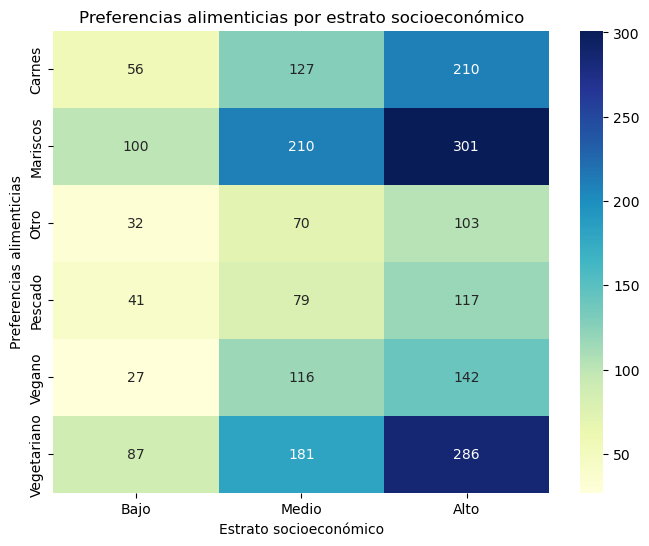

In [108]:
pref_estrato = pd.crosstab(df['preferencias_alimenticias'], df['estrato_socioeconomico'])
plt.figure(figsize=(8,6))
sns.heatmap(pref_estrato, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Preferencias alimenticias por estrato socioeconómico')
plt.xlabel('Estrato socioeconómico')
plt.ylabel('Preferencias alimenticias')
plt.show()


Integración de datos de restaurantes de Yelp: 
Desarrollo de función para generar recomendaciones teniendo en cuenta las categorías de restaurantes según preferencias alimenticias, y ordenando las recomendaciones según un promedio ajustado por la cantidad de reseñas. 

In [109]:
map_preferencias = {
    'Mariscos': ['Seafood', 'Asian Fusion', 'Mediterranean', 'Latin American', 'Peruvian', 'Cuban', 'Puerto Rican', 'Seafood Markets', 'Fish & Chips'],
    'Vegetariano': ['Vegetarian', 'Salad', 'Juice Bars & Smoothies', 'Vegan', 'Italian', 'Mediterranean', 'Indian', 'Lebanese', 'Greek'],
    'Vegano': ['Vegan', 'Vegetarian', 'Salad', 'Juice Bars & Smoothies', 'Indian', 'Thai'],
    'Carnes': ['Steakhouses', 'American', 'Barbeque', 'Burgers', 'Southern', 'Argentine', 'Butcher'],
    'Pescado': ['Seafood', 'Sushi Bars', 'Japanese', 'Peruvian', 'Mediterranean', 'Poke'],
    'Otro': []  # sin filtro

}

### Integración de datos: creamos una función para recomendar restaurant a los los clientes a partir de datos de Yelp

In [ ]:


def recomendar_restaurantes(
    id_persona, df_usuarios, df_resaurantes, 
    n=5, columnas=None
):
    # columnas a devolver
    if columnas is None:
        columnas = ['name', 'location.city', 'cat_precio', 'rating_ponderado', 'cat_titles']

    # datos del usuario
    user = df_usuarios.loc[df_usuarios['id_persona'] == id_persona].iloc[0]
    estrato = user['estrato_socioeconomico']
    pref = user['preferencias_alimenticias']
    
    # --- Paso 1: filtrar por estrato socioeconómico ---
    if estrato == 'Bajo':
        filtrados = df_resaurantes[df_resaurantes['cat_precio'].isin(['Bajo', 'Medio'])]
    elif estrato == 'Medio':
        filtrados = df_resaurantes[df_resaurantes['cat_precio'].isin(['Medio'])]
    elif estrato == 'Alto':
        filtrados = df_resaurantes[df_resaurantes['cat_precio'].isin(['Medio', 'Alto'])]
    elif estrato == 'Muy Alto':
        filtrados = df_resaurantes[df_resaurantes['cat_precio'].isin(['Alto', 'Muy alto'])]
    else:
        filtrados = df_resaurantes.copy()
    
    # --- Paso 2: filtrar por preferencias alimenticias ---
    categorias = map_preferencias.get(pref, [])
    if categorias:  # si hay categorías asociadas
        filtrados = filtrados[filtrados['cat_titles'].apply(
            lambda cats: any(cat in cats for cat in categorias)
        )]
    
    # --- Paso 3: ordenar por rating (ponderado por reviews)
    recomendados = filtrados.sort_values('rating_ponderado', ascending=False).head(n)
    
    return recomendados[columnas]


In [111]:
### Ejemplos de funcionamiento:
recomendar_restaurantes(2550327378, df, df_res)

,name,location.city,cat_precio,rating_ponderado,cat_titles
3,Fratellino,Coral Gables,Alto,4.724303,[Italian]
145,My Little Greek Deli,Miami Springs,Medio,4.578014,"[Greek, Delis]"
97,Cèrto,Miami,Medio,4.570947,"[Italian, Pizza, Venues & Event Spaces]"
59,Fugato,Coral Gables,Alto,4.569889,"[Mediterranean, Italian, Desserts]"
187,Giovanni's Ristorante,Miami,Medio,4.487342,"[Italian, Argentine]"


In [112]:
recomendar_restaurantes(2550327378, df, df_res, n=3, columnas= 'name')

3                Fratellino
145    My Little Greek Deli
97                    Cèrto
Name: name, dtype: object

In [95]:
# Para todo el df
df['recomendaciones'] = df['id_persona'].apply(
    lambda x: recomendar_restaurantes(x, df, df_res)['name'].tolist()
)


In [96]:

df.head()

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,recomendaciones
0,9153058633,Kathleen,Sweeney,18,Femenino,Miami,Alto,6,52.12,No,Sí,Vegetariano,No,+1-349-729-6766x15988,NaN,App,4102.0,"[Fratellino, My Little Greek Deli, Cèrto, Fuga..."
1,2547350680,Randy,Jenkins,18,Masculino,Miami,Alto,5,40.25,No,Sí,Vegano,Sí,818.272.7116,NaN,App,5070.0,"[The Cocinita Miami, Bombay Darbar, Pinocchio ..."
2,6746324509,Diane,Hubbard,18,Femenino,Miami,Alto,5,60.76,Sí,No,Mariscos,Sí,NaN,NaN,App,5650.0,"[La Cosecha Argentinian Steakhouse, Habana Con..."
3,6660341623,Karen,Griffith,18,Femenino,Miami,NaN,10,40.77,No,Sí,Otro,Sí,NaN,jason93@example.org,Tarjeta,14004.0,"[Fratellino, La Cosecha Argentinian Steakhouse..."
4,2455402454,Taylor,Hopkins,18,Femenino,Miami,NaN,8,62.13,Sí,Sí,Otro,Sí,+1-714-473-1540x972,stewartkatherine@example.org,Efectivo,13112.0,"[Fratellino, La Cosecha Argentinian Steakhouse..."


C:\Users\27267964837\AppData\Local\Temp\ipykernel_34108\3831364698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


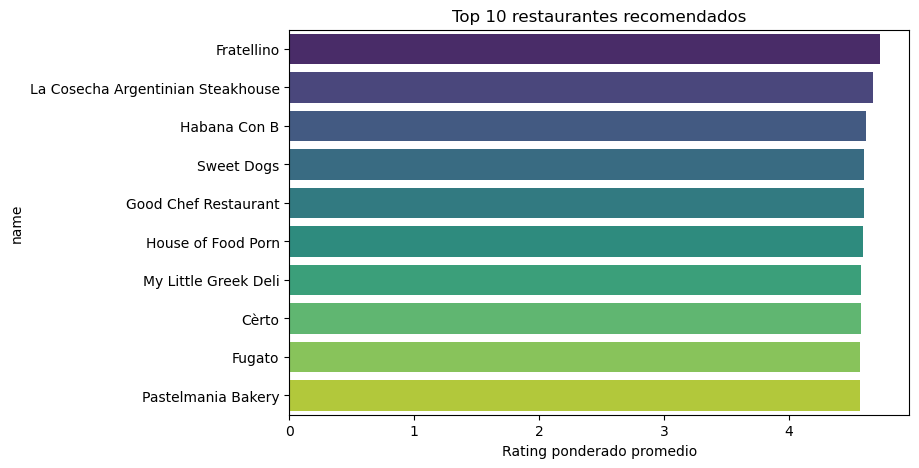

In [97]:
# Restaurant recomendados: 

top = df_res.groupby('name')['rating_ponderado'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.title('Top 10 restaurantes recomendados')
plt.xlabel('Rating ponderado promedio')
plt.show()


C:\Users\27267964837\AppData\Local\Temp\ipykernel_34108\7111494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cat_precio', data=df_res, palette='viridis')


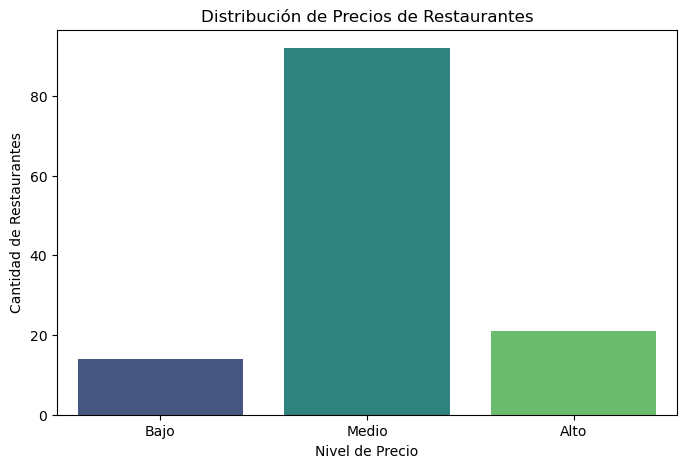

In [98]:
#ordenamos categoría de variable ordinal: 
orden = ['Bajo', 'Medio', 'Alto' ]
df_res['cat_precio'] = pd.Categorical(
    df_res['cat_precio'],
    categories=orden,
    ordered=True
)

#Para los restaurantes, distribuimos los mismos de acuerdo a su nivel de precios
plt.figure(figsize=(8,5))
sns.countplot(x='cat_precio', data=df_res, palette='viridis')
plt.title('Distribución de Precios de Restaurantes')
plt.xlabel('Nivel de Precio')
plt.ylabel('Cantidad de Restaurantes')
plt.show()

In [99]:
## Crear df a lo largo: 
 
import ast

# Convertir strings en listas/dicts de verdad
df_res["categories"] = df_res["categories"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# 1) extraer los títulos de cada categoría
df_res["cat_titles"] = df_res["categories"].apply(lambda x: [d["title"] for d in x])

# 2) "explotar" la lista en varias filas
df_long = df_res.explode("cat_titles")[["id", "cat_titles", 'rating_ponderado', 'cat_precio']]

df_long

,id,cat_titles,rating_ponderado,cat_precio
0,K3ukx2e11xTRtYBU01dmrA,Asian Fusion,4.372793,NaN
0,K3ukx2e11xTRtYBU01dmrA,Steakhouses,4.372793,NaN
0,K3ukx2e11xTRtYBU01dmrA,Cocktail Bars,4.372793,NaN
1,ix8ifP1jQM9ektdVAs19sQ,Mediterranean,4.215358,Medio
1,ix8ifP1jQM9ektdVAs19sQ,Italian,4.215358,Medio
...,...,...,...,...
197,Gf4_G1-yiX9iwHM138ZWFw,Vegan,4.486397,Medio
197,Gf4_G1-yiX9iwHM138ZWFw,Latin American,4.486397,Medio
197,Gf4_G1-yiX9iwHM138ZWFw,Vegetarian,4.486397,Medio
198,g-F5kChJsFopvG4YfYYKaw,Breakfast & Brunch,3.996949,Medio


C:\Users\27267964837\AppData\Local\Temp\ipykernel_34108\1759532368.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cats, x='cantidad', y='cat_titles', palette="viridis")


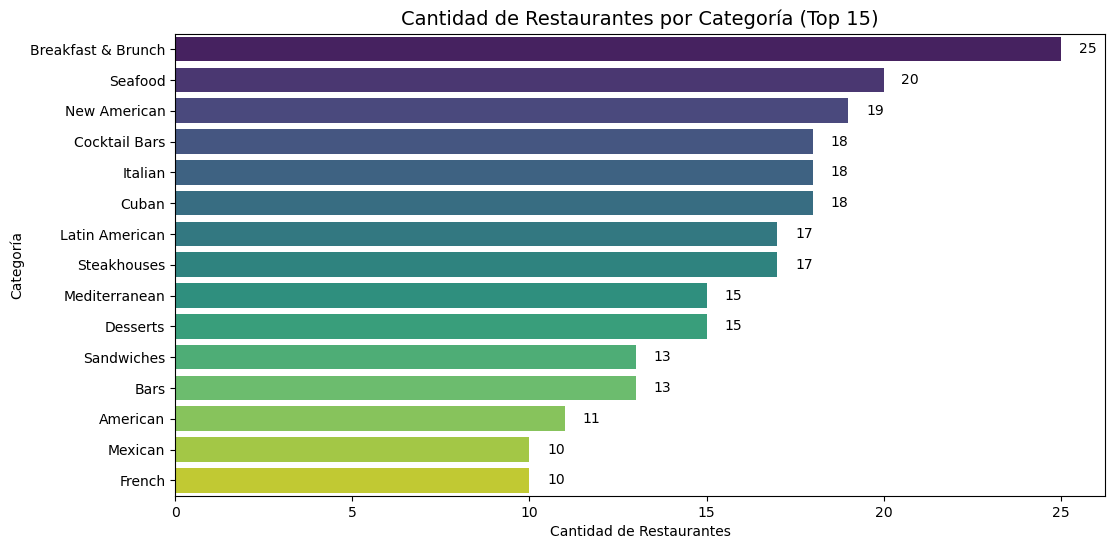

In [100]:

cat_stats = (
    df_long.groupby('cat_titles')
    .agg(
        cantidad=('id', 'count'),
        avg_weighted_rating=('rating_ponderado', 'mean')
    )
    .reset_index()
    .sort_values('cantidad', ascending=False)
)

top_cats = cat_stats.head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top_cats, x='cantidad', y='cat_titles', palette="viridis")
plt.title("Cantidad de Restaurantes por Categoría (Top 15)", fontsize=14)
plt.xlabel("Cantidad de Restaurantes")
plt.ylabel("Categoría")

for i, v in enumerate(top_cats['cantidad']):
    plt.text(v + 0.5, i, str(v), va='center')

plt.show()

**Distribución por categorías**
- La mayor concentración de restaurantes se encuentra en categorías como **Breakfast & Brunch, Seafood y New American**.  

**Precios y posicionamiento**
- Los restaurantes de **nivel medio ($$)** concentran el mayor volumen de reseñas.
- Los restaurantes de **alto nivel ($$$ y $$$$)** tienen menos reseñas, pero mayor valoración promedio

**Campañas por rango de precios**:  
  - Promocionar ofertas en el segmento **medio** que concentra mayor tráfico.  
  - Estrategias de exclusividad para el segmento **alto**.

**Recomendación:**
Usar la función de recomendación para segmentar campañas de marketing gastronómico por estrato socioeconómico y preferencias alimentarias